# Projeto Final - Olist

## Descrição

"Conjunto de dados públicos de comércio eletrônico brasileiro por Olist
O conjunto de dados tem informações de 100 mil pedidos de 2016 a 2018 feitos em vários marketplaces no Brasil.

A Olist conecta pequenas empresas de todo o Brasil a canais sem complicações e com um único contrato. Esses comerciantes podem vender seus produtos através da Olist Store e enviá-los diretamente aos clientes usando os parceiros de logística da Olist.

Depois que um cliente compra o produto da Olist Store, um vendedor é notificado para atender esse pedido. Assim que o cliente recebe o produto, ou vence a data prevista de entrega, o cliente recebe uma pesquisa de satisfação por e-mail onde pode dar uma nota da experiência de compra e anotar alguns comentários."


## Importando Bibliotecas

In [54]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec

# Descrição dos dados

Each feature or columns of different csv files are described below:

* The  `olist_customers_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**customer_id** | Id of the consumer who made the purchase.
**customer_unique_id**    | Unique Id of the consumer.
**customer_zip_code_prefix** | Zip Code of the location of the consumer.
**customer_city** | Name of the City from where order is made.
**customer_state** |  State Code from where order is made(Ex- sao paulo-SP).

* The `olist_sellers_dataset.csv` contains following features:

Feature | Description 
----------|---------------
**seller_id** |   Unique Id of the seller registered in olist.
**seller_zip_code_prefix** | Zip Code of the location of the seller.
**seller_city** | Name of the City of the seller.
**seller_state** | State Code (Ex- sao paulo-SP)


* The `olist_order_items_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**order_item_id** | A Unique id given to each item ordered in the order.
**product_id** |A unique id given to each product available on the site.
**seller_id** | Unique Id of the seller registered in olist.
**shipping_limit_date** | The date before which shipping of the ordered    product must be completed.
**price** | Actual price of the products ordered .
**freight_value** | Price rate at which a product is delivered from one point to another. 

* The `olist_order_payments_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**payment_sequential** | sequences of the payments made in case of EMI.
**payment_type** |  mode of payment used.(Ex-Credit Card)
**payment_installments** | number of installments in case of EMI purchase.
**payment_value** | Total amount paid for the purshase order.



* The `olist_orders_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**customer_id** | Id of the consumer who made the purchase.
**order_status** | status of the order made i.e delivered, shipped etc.
**order_purchase_timestamp** | Timestamp of the purchase.
**order_approved_at** | Timestamp of the order approval.
**order_delivered_carrier_date** | delivery date at which carrier made the delivery.
**order_delivered_customer_date** | date at which customer got the product.
**order_estimated_delivery_date** | estimated delivery date of the products.


* The `olist_order_reviews_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**review_id** |Id of the review given on the product ordered by the order id.
**order_id** |  A unique id of order made by the consumers.
**review_score** | review score given by the customer for each order on the scale of 1–5. 
**review_comment_title** | Title of the review
**review_comment_message** | Review comments posted by the consumer for each order.
**review_creation_date** |Timestamp of the review when it is created.
**review_answer_timestamp** | Timestamp of the review answered.


* The `olist_products_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**product_id** | A unique identifier for the proposed project.
**product_category_name** | Name of the product category
**product_name_lenght** | length of the string which specify the name given to the products ordered.
**product_description_lenght** | length of the description written for each product ordered on the site.
**product_photos_qty** | Number of photos of each product ordered available on the shopping portal.
**product_weight_g** | Weight of the products ordered in grams.
**product_length_cm** | Length of the products ordered in centimeters.
**product_height_cm** | Height of the products ordered in centimeters.
**product_width_cm** | width of the product ordered in centimeters.


# Leitura arquivos

In [3]:
itens = pd.read_csv("Data/itens.csv") # items
ordens = pd.read_csv("Data/ordens.csv") # order
produtos = pd.read_csv("Data/produtos.csv") # products
geolocal = pd.read_csv("Data/geolocal.csv") # geolocation
avaliacoes = pd.read_csv('Data/avaliacoes.csv') # reviews
clientes = pd.read_csv("Data/clientes.csv") # customers
pagamentos = pd.read_csv("Data/pagamentos.csv") # payments
vendedores = pd.read_csv("Data/vendedores.csv") # seller

# Verificando dados - Atualizados

## Itens - items

* Tabela 'itens' com 112650 linhas e 8 colunas (order_id, product_id, seller_id,shipping_limit_date, price,freight_value  )

In [5]:
itens.shape

(112650, 8)

In [6]:
itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           112650 non-null  int64  
 1   order_id             112650 non-null  object 
 2   order_item_id        112650 non-null  int64  
 3   product_id           112650 non-null  object 
 4   seller_id            112650 non-null  object 
 5   shipping_limit_date  112650 non-null  object 
 6   price                112650 non-null  float64
 7   freight_value        112650 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


In [7]:
itens.isnull().sum()

Unnamed: 0             0
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [8]:
itens.columns

Index(['Unnamed: 0', 'order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

## Ordens - order

Tabela 'ordens' tem 99441 linhas e 9 colunas ('order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
'order_approved_at', 'order_delivered_carrier_date',
'order_delivered_customer_date', 'order_estimated_delivery_date)


Nulos (order_approved_at - 160, order_delivered_carrier_date -  1783, order_delivered_customer_date- 2965)

In [10]:
ordens.shape

(99441, 9)

In [11]:
ordens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     99441 non-null  int64 
 1   order_id                       99441 non-null  object
 2   customer_id                    99441 non-null  object
 3   order_status                   99441 non-null  object
 4   order_purchase_timestamp       99441 non-null  object
 5   order_approved_at              99441 non-null  object
 6   order_delivered_carrier_date   99441 non-null  object
 7   order_delivered_customer_date  99441 non-null  object
 8   order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.8+ MB


In [12]:
ordens.isnull().sum()

Unnamed: 0                       0
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [16]:
ordens.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

## Produtos - products

Tabela com 32340 linhas com 6 colunas

In [44]:
produtos.shape

(32340, 7)

In [45]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32340 entries, 0 to 32339
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             32340 non-null  int64  
 1   product_id             32340 non-null  object 
 2   product_category_name  32340 non-null  object 
 3   product_weight_g       32340 non-null  float64
 4   product_length_cm      32340 non-null  float64
 5   product_height_cm      32340 non-null  float64
 6   product_width_cm       32340 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.7+ MB


In [46]:
produtos.isnull().sum()

Unnamed: 0               0
product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [47]:
produtos.columns

Index(['Unnamed: 0', 'product_id', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [49]:
produtos['product_category_name'].value_counts().head(10)

cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_category_name, dtype: int64

## Avaliações - reviews

Tabela 'avaliacoes' tem 99224 linhas e 7 colunas (review_id,order_id, review_score, 
review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp)

In [13]:
avaliacoes.shape

(99224, 7)

In [14]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0.1             99224 non-null  int64 
 1   Unnamed: 0               99224 non-null  int64 
 2   review_id                99224 non-null  object
 3   order_id                 99224 non-null  object
 4   review_score             99224 non-null  int64 
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [15]:
avaliacoes.isnull().sum()

Unnamed: 0.1               0
Unnamed: 0                 0
review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [17]:
avaliacoes.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'review_id', 'order_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

## Vendedores - Seller

Tabela de vendedores 3095 linhas  5 colunas ('seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state')

In [18]:
vendedores.shape

(3095, 5)

In [19]:
vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              3095 non-null   int64 
 1   seller_id               3095 non-null   object
 2   seller_zip_code_prefix  3095 non-null   int64 
 3   seller_city             3095 non-null   object
 4   seller_state            3095 non-null   object
dtypes: int64(2), object(3)
memory usage: 121.0+ KB


In [20]:
vendedores.isnull().sum()

Unnamed: 0                0
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [21]:
vendedores.columns

Index(['Unnamed: 0', 'seller_id', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

## Pagamentos - payments

Tabela de pagamentos 103886 linhas  5 colunas ('order_id', 'payment_sequential', 'payment_type','payment_installments', 'payment_value')

In [22]:
pagamentos.shape

(103883, 6)

In [23]:
pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103883 entries, 0 to 103882
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            103883 non-null  int64  
 1   order_id              103883 non-null  object 
 2   payment_sequential    103883 non-null  int64  
 3   payment_type          103883 non-null  object 
 4   payment_installments  103883 non-null  int64  
 5   payment_value         103883 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


In [24]:
pagamentos.isnull().sum()

Unnamed: 0              0
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [25]:
pagamentos.columns

Index(['Unnamed: 0', 'order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [27]:
pagamentos['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

## Clientes - customers

Tabela de clientes 99441 linhas  5 colunas ('customer_id', 'customer_unique_id', 'customer_zip_code_prefix','customer_city', 'customer_state')

In [28]:
clientes.shape

(99441, 6)

In [29]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                99441 non-null  int64 
 1   customer_id               99441 non-null  object
 2   customer_unique_id        99441 non-null  object
 3   customer_zip_code_prefix  99441 non-null  int64 
 4   customer_city             99441 non-null  object
 5   customer_state            99441 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


In [30]:
clientes.isnull().sum()

Unnamed: 0                  0
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [31]:
clientes.columns

Index(['Unnamed: 0', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

### Cidade

In [32]:
clientes.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

### Estado

In [34]:
clientes.customer_state.unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [35]:
clientes.groupby('customer_city').count()['customer_id'].reset_index()

,customer_city,customer_id
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2
...,...,...
4114,xinguara,9
4115,xique-xique,3
4116,zacarias,2
4117,ze doca,5


## Geocalização

In [37]:
geolocal.shape

(1000163, 6)

In [38]:
geolocal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 6 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1000163 non-null  int64  
 1   geolocation_zip_code_prefix  1000163 non-null  int64  
 2   geolocation_lat              1000163 non-null  float64
 3   geolocation_lng              1000163 non-null  float64
 4   geolocation_city             1000163 non-null  object 
 5   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 45.8+ MB


In [39]:
clientes.isnull().sum()

Unnamed: 0                  0
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [41]:
geolocal.columns

Index(['Unnamed: 0', 'geolocation_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_city', 'geolocation_state'],
      dtype='object')

In [42]:
geolocal['geolocation_city'].value_counts()

sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: geolocation_city, Length: 8011, dtype: int64

# Analisando dados ausentes - DataFrame original

In [60]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
seller_state,1547756,0.996017
seller_city,1547756,0.996017
seller_zip_code_prefix,1547756,0.996017
review_comment_title,1542378,0.992556
product_photos_qty,1521605,0.979188


## Transformando Datetime (ordens)

In [ ]:
times_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date', 'order_delivered_customer_date']
for col in times_cols:
    ordens[col] = pd.to_datetime(ordens[col])


## Fazendo Drop colunas

Opção para drop em colunas com percentual de numeros ausentes superior a 97% dos dados

In [61]:
df.drop(['seller_state', 'seller_city', 'seller_zip_code_prefix', 'review_comment_title', 'product_photos_qty'],axis=1, inplace=True)

Dropando as colunas 'review_comment_title', 'review_comment_message'

In [ ]:
avaliacoes.drop(['review_comment_title', 'review_comment_message'],axis=1, inplace=True)

'''Após a limpeza o dataframe possui 99224 linhas e 5 colunas (review_id,order_id,review_score,
 review_creation_date,review_answer_timestamp) '''   

## Fazendo Drop Duplicates

In [ ]:
geolocal.drop_duplicates(inplace=True)

## Dropando linhas em nulo

In [ ]:
produtos.dropna(inplace=True)

In [ ]:
produtos.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty'],axis=1, inplace=True)

## Tratando linhas nulas(ordens)

Convertendo linhas nulas por informações próximas

In [ ]:
ordens["order_approved_at"].fillna(ordens["order_purchase_timestamp"], inplace=True)
ordens["order_delivered_customer_date"].fillna(ordens["order_estimated_delivery_date"], inplace=True)
ordens["order_delivered_carrier_date"].fillna(ordens["order_delivered_customer_date"], inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553946 entries, 0 to 1553945
Data columns (total 39 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   customer_id                    198882 non-null   object 
 1   customer_unique_id             99441 non-null    object 
 2   customer_zip_code_prefix       99441 non-null    float64
 3   customer_city                  99441 non-null    object 
 4   customer_state                 99441 non-null    object 
 5   geolocation_zip_code_prefix    1000163 non-null  float64
 6   geolocation_lat                1000163 non-null  float64
 7   geolocation_lng                1000163 non-null  float64
 8   geolocation_city               1000163 non-null  object 
 9   geolocation_state              1000163 non-null  object 
 10  order_id                       415201 non-null   object 
 11  order_status                   99441 non-null    object 
 12  order_purchase

## Gráficos

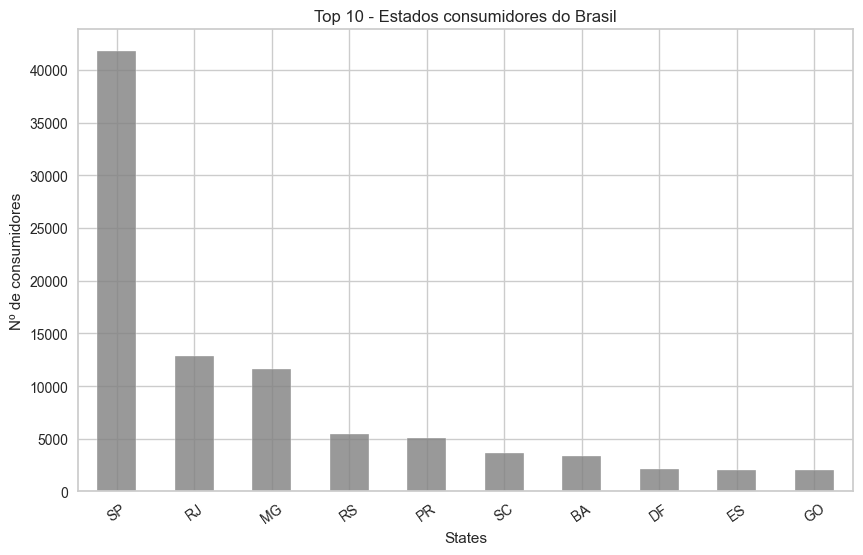

In [56]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = clientes.customer_state.value_counts().sort_values(ascending=False)[0:10].plot(kind='bar', color = 'grey', alpha=0.8)
ax.set_title("Top 10 - Estados consumidores do Brasil")
ax.set_xlabel("States")
plt.xticks(rotation=35)
ax.set_ylabel("Nº de consumidores")
plt.show()

## Pipeline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
import sklearn
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

## Localização

In [ ]:
from opencage.geocoder import OpenCageGeocode
